In [25]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [13]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [14]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')  # Load CSV with semicolon separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col].astype(str))

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]  # Select specified features

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Apply StandardScaler

    return X_scaled, df


# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [15]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        # Set random seed for reproducibility
        np.random.seed(self.random_state)

        # Randomly select n_clusters distinct indices from the dataset
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)

        # Use these indices to select actual data points as initial centroids
        centroids = X[random_indices]

        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # Initialize distance matrix: (n_samples, n_clusters)
        distances = np.zeros((X.shape[0], self.n_clusters))

        # Calculate Euclidean distance from each point to each centroid
        for i, centroid in enumerate(self.centroids):
            # Compute distance between all points and current centroid
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)

        # Assign each point to the nearest centroid (minimum distance)
        labels = np.argmin(distances, axis=1)

        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        # Initialize new centroids array
        centroids = np.zeros((self.n_clusters, X.shape[1]))

        # For each cluster, compute the mean of assigned points
        for k in range(self.n_clusters):
            # Get all points assigned to cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Compute mean of all points in this cluster
                centroids[k] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, reinitialize randomly
                # This handles edge case where no points are assigned
                centroids[k] = X[np.random.choice(X.shape[0])]

        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Step 1: Initialize centroids
        self.centroids = self._initialize_centroids(X)

        # Step 2: Iterate until convergence or max iterations
        for iteration in range(self.max_iters):
            # Assign each point to nearest centroid
            labels = self._assign_clusters(X)

            # Update centroids based on current assignments
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence (if centroids haven't changed significantly)
            if np.allclose(self.centroids, new_centroids, rtol=1e-6):
                print(f"Converged at iteration {iteration + 1}")
                break

            # Update centroids for next iteration
            self.centroids = new_centroids

        # Store final labels
        self.labels = labels

        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


In [16]:
# Test the KMeans implementation
print("Testing K-Means Implementation")
print("=" * 60)

# Create a simple test dataset
np.random.seed(42)
test_X = np.random.randn(100, 2)

# Initialize and fit K-means
kmeans_test = KMeansClustering(n_clusters=3, random_state=42)
kmeans_test.fit(test_X)

print(f"\nNumber of clusters: {kmeans_test.n_clusters}")
print(f"Centroid shape: {kmeans_test.centroids.shape}")
print(f"Labels shape: {kmeans_test.labels.shape}")
print(f"\nCentroids:\n{kmeans_test.centroids}")
print(f"\nUnique labels: {np.unique(kmeans_test.labels)}")
print(f"Cluster sizes: {np.bincount(kmeans_test.labels)}")

# Test predict on new data
new_points = np.array([[0, 0], [1, 1], [-1, -1]])
predictions = kmeans_test.predict(new_points)
print(f"\nPredictions for new points: {predictions}")
print("=" * 60)


Testing K-Means Implementation
Converged at iteration 8

Number of clusters: 3
Centroid shape: (3, 2)
Labels shape: (100,)

Centroids:
[[ 0.37051418  1.0190211 ]
 [ 0.2900922  -0.94259951]
 [-0.983437   -0.03180296]]

Unique labels: [0 1 2]
Cluster sizes: [34 32 34]

Predictions for new points: [2 0 2]


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

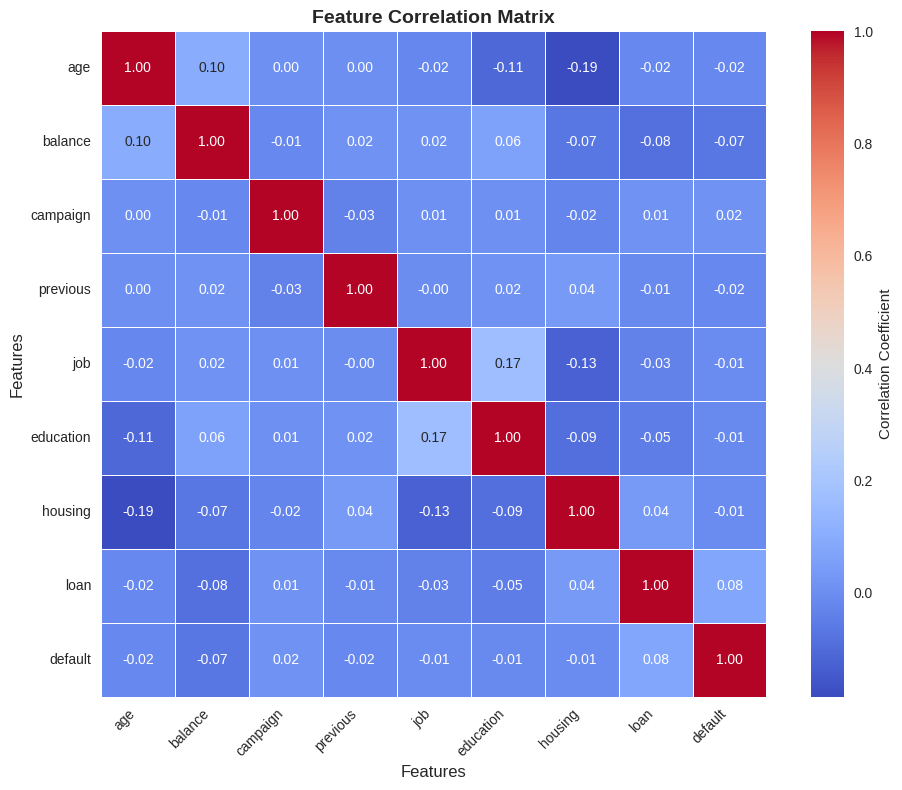


Correlation Insights:

Top 5 Feature Correlations:
  age <-> housing: -0.186
  job <-> education: 0.167
  job <-> housing: -0.125
  age <-> education: -0.107
  age <-> balance: 0.098



In [17]:
# Visualize feature correlation matrix
plt.figure(figsize=(10, 8))

# Select the features used for clustering
feature_names = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']

# Create dataframe with just these features
df_features = data[feature_names]

# Calculate correlation matrix
correlation_matrix = df_features.corr()

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimal places
            cmap='coolwarm',      # Color scheme (blue=negative, red=positive)
            square=True,          # Make cells square-shaped
            linewidths=0.5,       # Add lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print some insights
print("\nCorrelation Insights:")
print("="*60)

# Find highest correlations (excluding diagonal)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

# Sort by absolute correlation value
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nTop 5 Feature Correlations:")
for feat1, feat2, corr in corr_pairs[:5]:
    print(f"  {feat1} <-> {feat2}: {corr:.3f}")

print("\n" + "="*60)


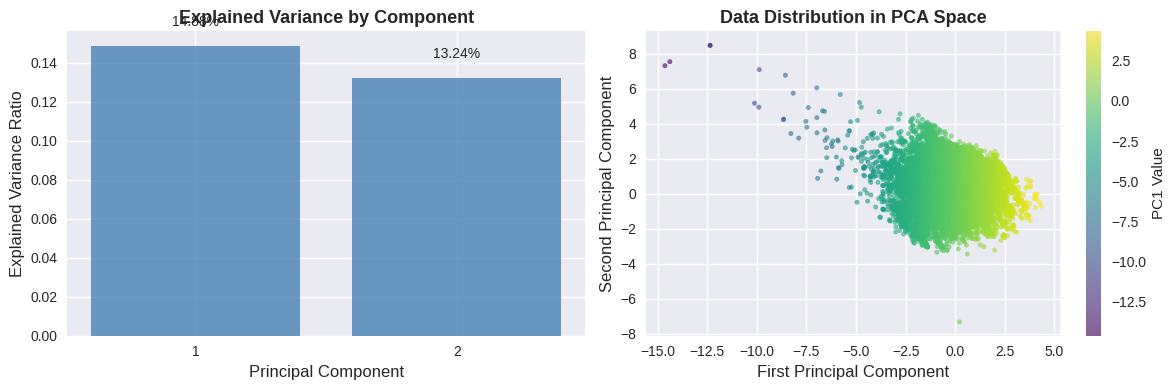

Explained variance ratio: [0.14878447 0.13240902]
Total variance explained: 28.12%
Shape after PCA: (45211, 2)


In [18]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot 1: Explained variance ratio
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_,
            color='steelblue', alpha=0.8)
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.title('Explained Variance by Component', fontsize=13, fontweight='bold')
    plt.xticks(range(1, n_components + 1))

    # Add percentage labels on bars
    for i, v in enumerate(pca.explained_variance_ratio_):
        plt.text(i + 1, v + 0.01, f'{v:.2%}', ha='center', fontsize=10)

    # Plot 2: Data distribution in 2D PCA space
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                         c=X_pca[:, 0], cmap='viridis',
                         alpha=0.6, s=10)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)
    plt.title('Data Distribution in PCA Space', fontsize=13, fontweight='bold')
    plt.colorbar(scatter, label='PC1 Value')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

    return X_pca


# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Converged at iteration 32
Converged at iteration 27
Converged at iteration 25
Converged at iteration 34
Converged at iteration 24
Converged at iteration 99
Converged at iteration 35
Converged at iteration 70
Converged at iteration 69


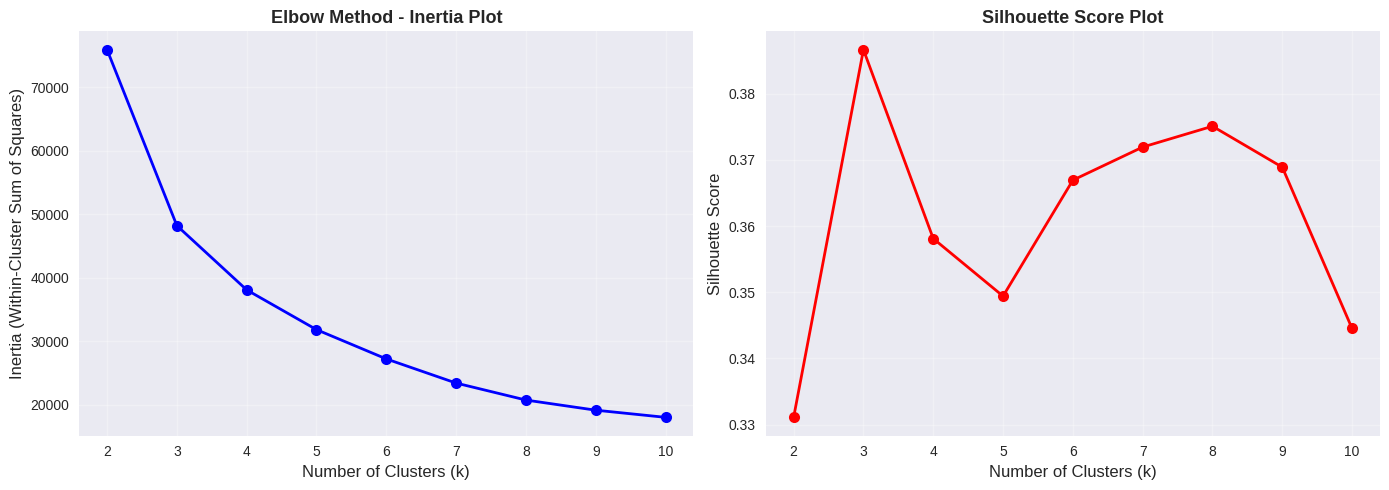

Converged at iteration 27


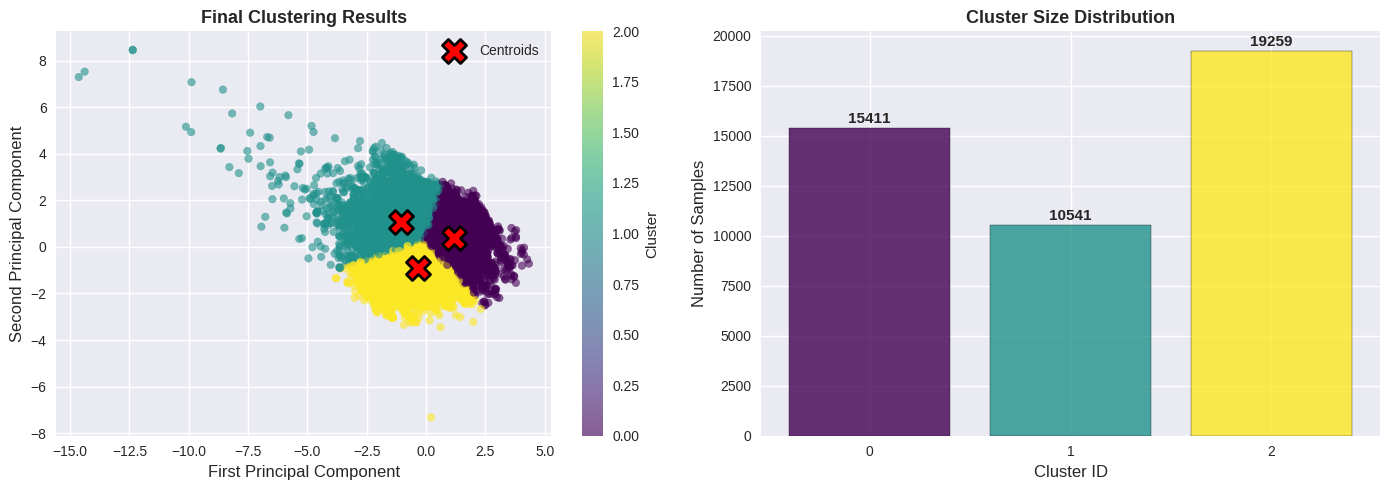


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.3867

Cluster Sizes:
  Cluster 0: 15411 samples (34.1%)
  Cluster 1: 10541 samples (23.3%)
  Cluster 2: 19259 samples (42.6%)


In [19]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0

    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        # Get all points assigned to cluster k
        cluster_points = X[labels == k]

        if len(cluster_points) > 0:
            # Calculate Euclidean distance from each point to its centroid
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
            # Sum of squared distances
            inertia += np.sum(distances ** 2)

    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Start from 2 (silhouette needs at least 2 clusters)

    # Calculate inertia for different k values
    for k in K:
        # Fit K-means with k clusters
        kmeans = KMeansClustering(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Calculate inertia
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

        # Calculate silhouette score
        sil_score = silhouette_score(X, kmeans.labels)
        silhouette_scores.append(sil_score)

    # Create elbow plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Elbow curve (Inertia)
    axes[0].plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
    axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
    axes[0].set_title('Elbow Method - Inertia Plot', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xticks(K)

    # Plot 2: Silhouette scores
    axes[1].plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
    axes[1].set_ylabel('Silhouette Score', fontsize=12)
    axes[1].set_title('Silhouette Score Plot', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticks(K)

    plt.tight_layout()
    plt.show()

    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)


# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)


# Visualize final results
plt.figure(figsize=(14, 5))


# Plot 1: Clusters with centroids
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels,
                     cmap='viridis', alpha=0.6, s=30)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=300, edgecolors='black', linewidths=2,
            label='Centroids')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Final Clustering Results', fontsize=13, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()


# Plot 2: Evaluation metrics - Cluster sizes
plt.subplot(1, 2, 2)
unique, counts = np.unique(kmeans.labels, return_counts=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique)))
bars = plt.bar(unique, counts, color=colors, alpha=0.8, edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Cluster Size Distribution', fontsize=13, fontweight='bold')
plt.xticks(unique)

# Add count labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
            str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')


plt.tight_layout()
plt.show()


# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)


print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"\nCluster Sizes:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(kmeans.labels)*100:.1f}%)")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

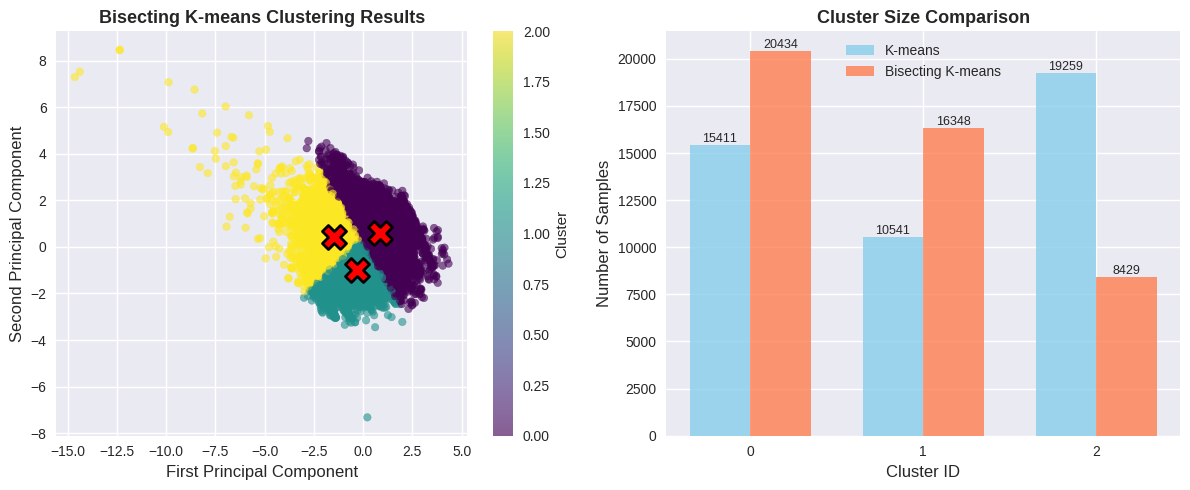


Bisecting K-Means Evaluation:
Number of clusters: 3
Silhouette Score: 0.3379

Split Tree: {np.int64(0): (np.int64(0), 1), np.int64(1): (np.int64(1), 2)}

Cluster Sizes:
  Cluster 0: 20434 samples (45.2%)
  Cluster 1: 16348 samples (36.2%)
  Cluster 2: 8429 samples (18.6%)

Comparison with K-means:
K-means Silhouette Score: 0.3867
Bisecting K-means Silhouette Score: 0.3379


In [20]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans

        # Step 1: Start with all points in cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        next_label = 1  # Counter for new cluster labels

        # Calculate initial centroid for cluster 0
        self.centers_[0] = X.mean(axis=0)

        # Step 2: Loop until we have the desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]

            # Get all points in the cluster to split
            cluster_mask = self.labels_ == cluster_to_split
            cluster_points = X[cluster_mask]

            # Split this cluster into 2 using K-means
            kmeans_split = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans_split.fit_predict(cluster_points)

            # Get indices of points in the cluster being split
            sub_cluster_indices = np.where(cluster_mask)[0]

            # Create masks for the two sub-clusters
            mask_0 = sub_labels == 0
            mask_1 = sub_labels == 1

            # Keep cluster_to_split label for one part (sub-cluster 0)
            # Assign next_label to the other part (sub-cluster 1)
            self.labels_[sub_cluster_indices[mask_1]] = next_label

            # Store centroids for both sub-clusters
            self.centers_[cluster_to_split] = kmeans_split.cluster_centers_[0]
            self.centers_[next_label] = kmeans_split.cluster_centers_[1]

            # Record the split in the tree
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)

            # Increment label counter for next split
            next_label += 1

        return self.labels_


# Apply Bisecting K-Means
bisecting_kmeans = BisectingKMeans(n_clusters=3, random_state=42)
bisecting_labels = bisecting_kmeans.fit_predict(X_pca)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Bisecting K-Means Results
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bisecting_labels,
                     cmap='viridis', alpha=0.6, s=30)
# Plot centroids
for label, centroid in bisecting_kmeans.centers_.items():
    if label < 3:  # Only plot the final 3 cluster centroids
        plt.scatter(centroid[0], centroid[1], c='red', marker='X',
                   s=300, edgecolors='black', linewidths=2)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Bisecting K-means Clustering Results', fontsize=13, fontweight='bold')
plt.colorbar(scatter, label='Cluster')

# Plot 2: Cluster Size Comparison
plt.subplot(1, 2, 2)
unique_bisect, counts_bisect = np.unique(bisecting_labels, return_counts=True)
unique_kmeans, counts_kmeans = np.unique(kmeans.labels, return_counts=True)

x = np.arange(len(unique_bisect))
width = 0.35

bars1 = plt.bar(x - width/2, counts_kmeans, width, label='K-means', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, counts_bisect, width, label='Bisecting K-means', alpha=0.8, color='coral')

plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Cluster Size Comparison', fontsize=13, fontweight='bold')
plt.xticks(x)
plt.legend()

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print evaluation
print("\nBisecting K-Means Evaluation:")
print(f"Number of clusters: {len(np.unique(bisecting_labels))}")
print(f"Silhouette Score: {silhouette_score(X_pca, bisecting_labels):.4f}")
print(f"\nSplit Tree: {bisecting_kmeans.split_tree}")
print(f"\nCluster Sizes:")
for cluster_id, count in zip(unique_bisect, counts_bisect):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(bisecting_labels)*100:.1f}%)")

# Compare with regular K-means
print(f"\nComparison with K-means:")
print(f"K-means Silhouette Score: {silhouette_score(X_pca, kmeans.labels):.4f}")
print(f"Bisecting K-means Silhouette Score: {silhouette_score(X_pca, bisecting_labels):.4f}")


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

/tmp/ipython-input-1579432454.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(cluster_silhouette_data,


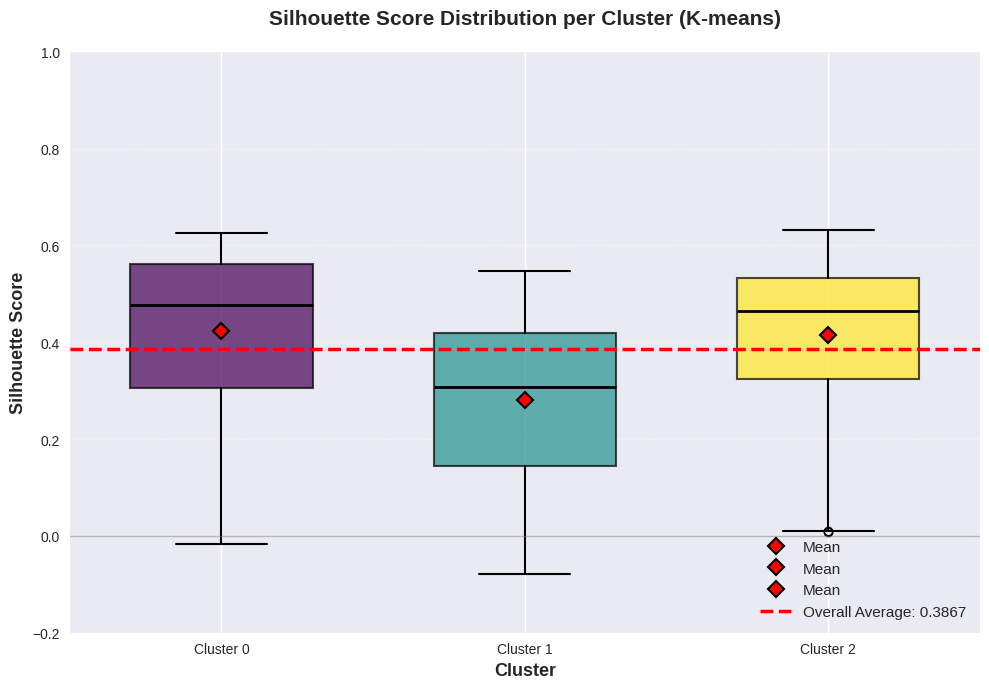


SILHOUETTE SCORE ANALYSIS - K-MEANS CLUSTERING

Overall Silhouette Score: 0.3867

Per-Cluster Silhouette Statistics:
Cluster    Mean       Median     Min        Max        Std Dev   
--------------------------------------------------------------------------------
0          0.4227     0.4774     -0.0173    0.6264     0.1685    
1          0.2803     0.3082     -0.0784    0.5480     0.1691    
2          0.4160     0.4650     0.0084     0.6316     0.1557    
--------------------------------------------------------------------------------

Interpretation Guide:
  • Score near +1: Sample is well-matched to its cluster
  • Score near  0: Sample is on the boundary between clusters
  • Score near -1: Sample may be assigned to wrong cluster


In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate silhouette scores for each individual sample
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

# Calculate overall average silhouette score
avg_silhouette = silhouette_score(X_pca, kmeans.labels)

# Get unique cluster labels
unique_clusters = np.unique(kmeans.labels)

# Prepare data for box plot - separate silhouette scores by cluster
cluster_silhouette_data = []
cluster_stats = []

for cluster_id in unique_clusters:
    # Get silhouette scores for this cluster
    cluster_scores = silhouette_vals[kmeans.labels == cluster_id]
    cluster_silhouette_data.append(cluster_scores)

    # Store statistics for printing
    cluster_stats.append({
        'cluster': cluster_id,
        'mean': cluster_scores.mean(),
        'median': np.median(cluster_scores),
        'min': cluster_scores.min(),
        'max': cluster_scores.max(),
        'std': cluster_scores.std()
    })

# Create the box plot
plt.figure(figsize=(10, 7))

# Create box plot with custom styling
bp = plt.boxplot(cluster_silhouette_data,
                labels=[f'Cluster {i}' for i in unique_clusters],
                patch_artist=True,           # Enable coloring
                widths=0.6,                  # Box width
                showmeans=True,              # Show mean as diamond
                meanprops=dict(marker='D',   # Diamond shape for mean
                              markerfacecolor='red',
                              markersize=8,
                              markeredgecolor='black',
                              markeredgewidth=1.5,
                              label='Mean'),
                medianprops=dict(color='black', linewidth=2),  # Median line
                boxprops=dict(linewidth=1.5),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

# Color the boxes to match cluster colors from viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')

# Add horizontal line for overall average silhouette score
plt.axhline(y=avg_silhouette,
           color='red',
           linestyle='--',
           linewidth=2.5,
           label=f'Overall Average: {avg_silhouette:.4f}',
           zorder=5)

# Add horizontal line at y=0 for reference
plt.axhline(y=0,
           color='gray',
           linestyle='-',
           linewidth=1,
           alpha=0.5)

# Labels and title
plt.xlabel('Cluster', fontsize=13, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=13, fontweight='bold')
plt.title('Silhouette Score Distribution per Cluster (K-means)',
         fontsize=15, fontweight='bold', pad=20)

# Add grid
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

# Legend
plt.legend(fontsize=11, loc='lower right')

# Set y-axis limits for better visualization
plt.ylim(-0.2, 1.0)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("SILHOUETTE SCORE ANALYSIS - K-MEANS CLUSTERING")
print("="*80)

print(f"\nOverall Silhouette Score: {avg_silhouette:.4f}")
print("\nPer-Cluster Silhouette Statistics:")
print(f"{'Cluster':<10} {'Mean':<10} {'Median':<10} {'Min':<10} {'Max':<10} {'Std Dev':<10}")
print("-"*80)

for stats in cluster_stats:
    print(f"{stats['cluster']:<10} "
          f"{stats['mean']:<10.4f} "
          f"{stats['median']:<10.4f} "
          f"{stats['min']:<10.4f} "
          f"{stats['max']:<10.4f} "
          f"{stats['std']:<10.4f}")

print("-"*80)

# Interpretation guide
print("\nInterpretation Guide:")
print("  • Score near +1: Sample is well-matched to its cluster")
print("  • Score near  0: Sample is on the boundary between clusters")
print("  • Score near -1: Sample may be assigned to wrong cluster")
print("="*80)
